# Lab 4 - PW4 - Iris dataset clustering with K-Means

## Preliminary Questions

1. #### *Is k-means clustering used for supervised or unsupervised classification?*

**ANSWER:** K-means clustering is simply what we know as partitioning data into *k* distinct clusters based on distance to the centroid of a cluster. To recall the unsupervised learning, it is a type of algorithm used to draw inferences from datasets consisting of input data without labeled responses. Now, K-means is just classification algorithm without having labels or class predefined rather than it groups datapoints together to a cluster. That's why K-means is unsupervised learning algorithm. 

2. #### *Knowing that we do have a labelled dataset, how many clusters are you going to set in your program?*

**ANSWER:** Three (3) clusters, because iris dataset is simply what consists of 3 different type of iris flower.

## Code

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

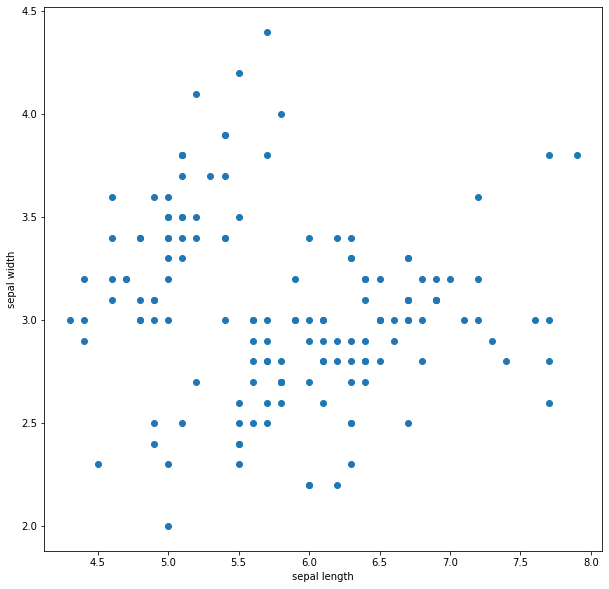

In [2]:
## Just a small code to load the famous iris dataset provided by sci-kitlearn lib
iris = datasets.load_iris()
X = iris.data

## need to extract the columns sepal length, width and petal length,width respectively
sepals = X[:,0:2]
petals = X[:,2:4]

## Simple Plot (only features of the dataset as points)
plt.figure(figsize=(10,10))
plt.scatter(X[:,0],X[:,1])
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

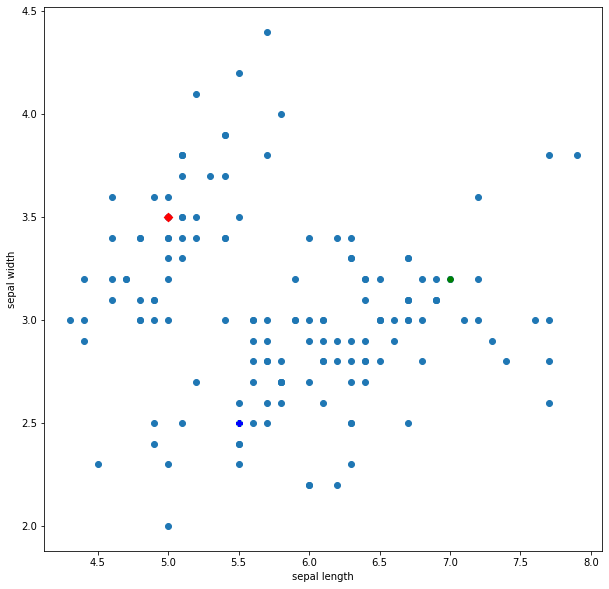

In [3]:
## Choosing the k number randomly and taking 3 random centroids.
## and displaying those centroids with different colors

k = 3

centroid1 = [5.0,3.5]
centroid2 = [7.0,3.2]
centroid3 = [5.5,2.5]

plt.figure(figsize=(10,10))

sepals = X[:,0:2]
petals = X[:]
plt.scatter(X[:,0],X[:,1])
plt.scatter(centroid1[0],centroid1[1],c='red',marker='D')
plt.scatter(centroid2[0],centroid2[1],c='green',marker='H')
plt.scatter(centroid3[0],centroid3[1],c='blue',marker='P')
plt.xlabel('sepal length')
plt.ylabel('sepal width')


plt.show()

### Defining necessary functions to operate easily

In [4]:
## returns euclidian distance between 2points
def distance(p1,p2):
  return ((p2[0]-p1[0])**2 + (p2[1]-p1[1])**2 + (p2[2]-p1[2])**2 + (p2[3]-p1[3])**2)**0.5

In [5]:
## choosing 3 random centroids each with 4 points.
## note that the random float numbers is chosen between the lowest 
## and highest value of all x's
centroids = list(zip(
    np.random.uniform(min(X[:,0]),max(X[:,0]),size=3), 
    np.random.uniform(min(X[:,1]),max(X[:,1]),size=3),
    np.random.uniform(min(X[:,2]),max(X[:,2]),size=3),
    np.random.uniform(min(X[:,3]),max(X[:,3]),size=3)
    )
)

## just to store the centroids in 2D array format
for i in range(len(centroids)):
  centroids[i] = [centroids[i][0],centroids[i][1],centroids[i][2],centroids[i][3]]
print(centroids)

[[4.4464586143778115, 3.8063089214781205, 2.3096475300107633, 2.101674001299642], [7.458030715382341, 3.4175082614818617, 4.216346788312128, 0.17033647291073387], [7.2832627544726805, 2.86486485930207, 5.708479415331737, 1.8185247184378543]]


In [6]:
## settings labels
## we're doing this because we will need to classify coordinates
## according to these labels, 0,1 and 2.
## meaning 0 is the closest and 2 furthest distance to the centroid.
labels = []
for i in X:
  dists = []
  for j in centroids:
    val = distance(i,j)
    dists.append(val)
  labels.append(np.argmin(dists))

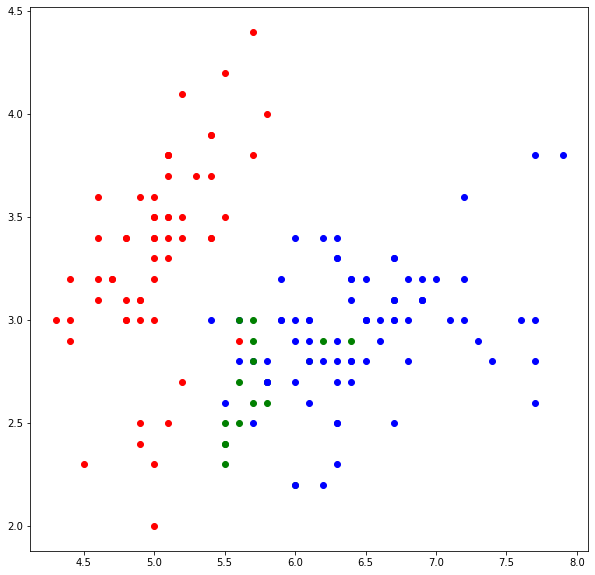

In [7]:
## plotting
colors = ['red','green','blue']

plt.figure(figsize=(10,10))
for i in range(len(sepals)):
  plt.scatter(sepals[i][0],sepals[i][1],c = colors[int(labels[i])])

In [8]:
## initializing clusters
cluster1,cluster2,cluster3 = [],[],[]
for i in range(len(X)):
  if labels[i]==0.:
    cluster1.append(list(X[i]))
  elif labels[i]==1.:
    cluster2.append(list(X[i]))
  elif labels[i]==2.:
    cluster3.append(list(X[i]))

## setting centroids first time after the cluster initialization 
centroids = [list(np.mean(cluster1,axis=0)),list(np.mean(cluster2,axis=0)),list(np.mean(cluster3,axis=0))]
print(centroids)

[[5.017543859649122, 3.3105263157894744, 1.7228070175438597, 0.36491228070175435], [5.810526315789474, 2.684210526315789, 4.036842105263158, 1.205263157894737], [6.487837837837835, 2.9581081081081084, 5.2540540540540555, 1.8405405405405408]]


In [9]:
## Finally, the real algorithm starts here.
## I'm giving it to a maximal number of iterations : 200
## updating clusters till they get more accurate
for count in range(200):
  labels = []
  for i in X:
    dists = []
    for j in centroids:
      val = distance(i,j)
      dists.append(val)
    labels.append(np.argmin(dists))
  
  cluster1,cluster2,cluster3 = [],[],[]
  for i in range(len(X)):
    if labels[i]==0.:
      cluster1.append(list(X[i]))
    elif labels[i]==1.:
      cluster2.append(list(X[i]))
    elif labels[i]==2.:
      cluster3.append(list(X[i]))
  
  centroids = [list(np.mean(cluster1,axis=0)),list(np.mean(cluster2,axis=0)),list(np.mean(cluster3,axis=0))]

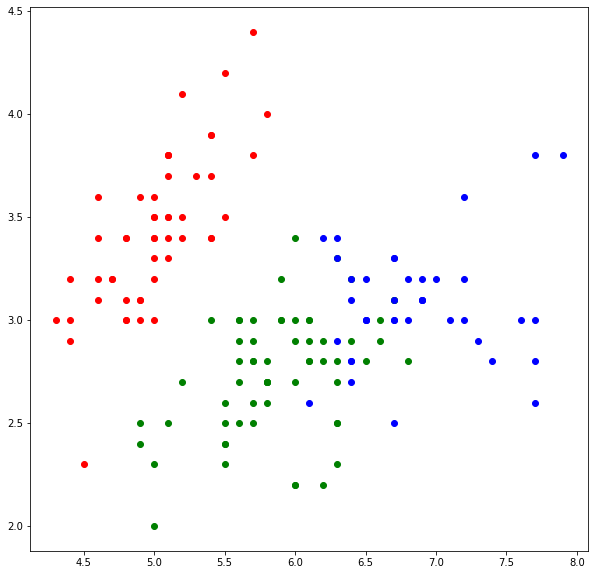

In [10]:
## Just plotting for visualization
colors = ['red','green','blue']

plt.figure(figsize=(10,10))
for i in range(len(sepals)):
  plt.scatter(sepals[i][0],sepals[i][1],c = colors[int(labels[i])])


In [11]:
## Saving to CSV file

np.savetxt('c1.csv', np.asarray(cluster1), delimiter=',')
np.savetxt('c2.csv', np.asarray(cluster2), delimiter=',')
np.savetxt('c3.csv', np.asarray(cluster3), delimiter=',')